<img src="./logo_UNSAM.jpg" align="right" width="150" />

#### Análisis y Procesamiento de Señales

# Tarea semanal Nº2
#### Guadalupe Cura

## INTRODUCCIÓN
En el campo del procesamiento de señales y datos, los sistemas cumplen un rol fundamental, ya que representan el conjunto de operaciones matemáticas que transforman una señal de entrada en una señal de salida.  En el procesamiento digital de señales, un sistema discreto en el tiempo puede ser una fórmula, un algoritmo, una operación matemática o un segmento de código que convierte una secuencia de entrada en una secuencia de salida.

Dentro de las distintas clasificaciones posibles, los sistemas lineales e invariantes en el tiempo (LTI) combinan dos propiedades que simplifican y ordenan el análisis, por lo cual son muy utilizados. 

 La linealidad implica que el sistema respeta los principios de aditividad y homogeneidad. La propiedad de aditividad establece que la respuesta del sistema a la suma de varias entradas es equivalente a la suma de las respuestas del sistema a cada entrada individual. Por su parte, la homogeneidad significa que la transformación de una entrada multiplicada por una constante es igual a la transformación de la entrada multiplicada por esa misma constante.
 
 La invariancia en el tiempo asegura que las características del sistema no dependen del instante en que se aplica la señal, es por eso que una misma entrada siempre genera la misma salida aunque se desplace en el tiempo.
 
Un punto clave para los sistemas LTI es que su estabilidad (es decir, que una entrada acotada produce una salida acotada - criterio BIBO) se puede determinar si y solo si la respuesta al impulso del sistema es absolutamente sumable. Por ejemplo, un sistema acumulador (summer) no es estable porque su respuesta al impulso es una secuencia escalón (u[n]), cuya suma es infinita.

Además, un resultado fundamental es que los sistemas LTI están completamente caracterizados por su respuesta al impulso h[n]. Sabiendo esta respuesta, se puede predecir la salida y[n] del sistema a cualquier entrada x[n] mediante la operación de convolución: y[n] = x[n] ∗ h[n].

En el procesamiento digital de señales se trabaja con sistemas discretos, en los cuales las señales se representan como secuencias de números x[n] en función de un índice entero n, en lugar de funciones continuas. 

 Esto implica que los cálculos asociados, como los de energía y potencia, deben realizarse de manera discreta. En general, las señales no periódicas y de duración finita se analizan mediante su energía, mientras que las señales periódicas y de duración infinita se estudian a través de su potencia. Esta distinción resulta fundamental para comprender el comportamiento de los sistemas LTI, ya que determina el tipo de análisis y las herramientas matemáticas que deben emplearse. 


## ANÁLISIS Y DESARROLLO
Para comenzar con la terea semanal, se definió un sistema lineal de diferencias de la siguiente manera:

    y[n]=3⋅10−2⋅x[n]+5⋅10−2⋅x[n−1]+3⋅10−2⋅x[n−2]+1.5⋅y[n−1]−0.5⋅y[n−2]
Una vez establecido el sistema, se fueron pasando los diferentes valores de las funciones utilizadas en la TS1, comenzando por la senoidal
    

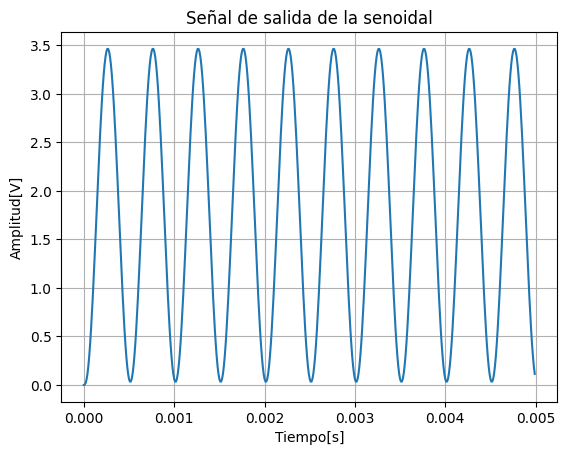

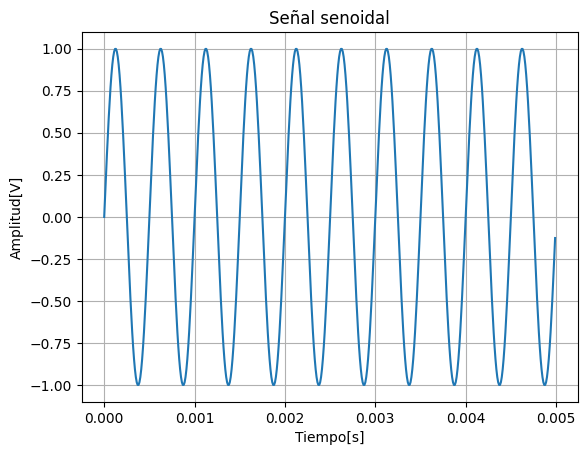

La energía de la senoidal es: 0.0025
La frecuencia de muestreo es: 100000Hz
El tiempo de simulación es: 0.005s

La energía de la salida de la senoidal es: 0.0227


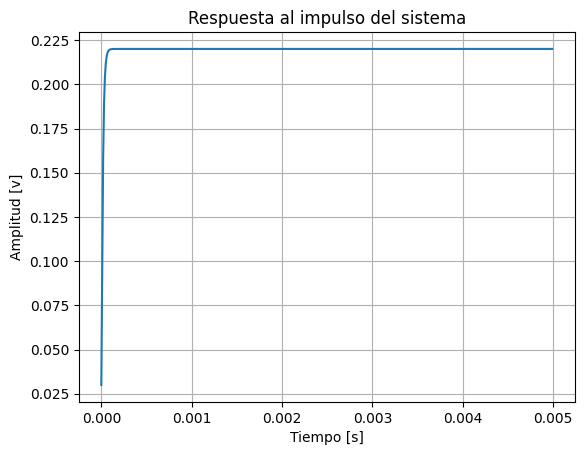

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal #para hacer la señal cuadrada

fm=100000 #frecuencia de muestreo
N=500    #cantidad de muestras
fs=2000   #frecuencia de la señal
dt=1/fm  #tiempo entre muestras

#--------------------------------------------------
#Seno
def funcion_seno(vc=1, dc=0, fs=None, ph=0, nn=N, fm=fm):
    t = np.linspace(0, N/fm, N, endpoint=False)
    sen=(vc*np.sin(2*np.pi*fs*t+ph)+dc)
    return t,sen
tt, yy = funcion_seno(vc=1, dc=0, fs=fs, ph=0, nn=N, fm=fm)
#----------------------------------------------------
#grafico
def funcion_grafico(x, y, titulo, ejex, ejey):  
    plt.plot(x, y)
    plt.title(titulo)
    plt.xlabel(ejex)
    plt.ylabel(ejey)
    plt.grid(True)
    plt.show()

#---------------------------------------------------


def funcion_LTI(x):
    N = len(x)          # longitud de la señal de entrada
    y = np.zeros(N)     # inicializo la salida en ceros

    for n in range(N):
        if n >= 2:
            y[n] = 0.03*x[n] + 0.05*x[n-1] + 0.03*x[n-2] + 1.5*y[n-1] - 0.5*y[n-2]
        elif n == 1:
            y[n] = 0.03*x[n] + 0.05*x[n-1] + 1.5*y[n-1]
        else:  # n == 0
            y[n] = 0.03*x[n]
    
    return y

senoidalLti= funcion_LTI(yy)
funcion_grafico(tt, senoidalLti, 'Señal de salida de la senoidal', 'Tiempo[s]', 'Amplitud[V]')

tt, yy = funcion_seno(vc=1, dc=0, fs=fs, ph=0, nn=N, fm=fm)
funcion_grafico(tt, yy, 'Señal senoidal', 'Tiempo[s]', 'Amplitud[V]')

energia1 = np.sum(yy**2)*dt
muestras1=len(yy)
tiempoMuestras1= dt
print(f'La energía de la senoidal es: {energia1:.4f}')
print(f'La frecuencia de muestreo es: {fm}Hz')
print(f'El tiempo de simulación es: {N*dt}s\n')

energia = np.sum(senoidalLti**2)*dt
muestras=len(senoidalLti)
tiempoMuestras= dt
print(f'La energía de la salida de la senoidal es: {energia:.4f}')

#---------------------------------------------------
# respuesta al impulso
impulso = np.zeros(N)
impulso[0] = 1  # delta[n]

respuesta_impulso = funcion_LTI(impulso)
funcion_grafico(np.arange(N)*dt, respuesta_impulso, 'Respuesta al impulso del sistema', 'Tiempo [s]', 'Amplitud [v]')



 Como resultado, se obtuvo una función senoidal pero con un aparente offset que la desplaza haciendo que la señal no este centrada en el eje x=0.  Si observamos la respuesta al impulso, se ve que la ecuación de diferencias funciona como una amplificadora. Es por esto que los puntos x[n] se encuentran desplazados, y son ahora todos positivos. A su vez, se mantuvo la frecuencia de la señal a 2KHz. Esto es porque la frecuencia depende de las muestras de entrada.
 
Si calculamos la energía para la salida es mayor a la energía de la senoidal original, lo que se atribuye al aumento en la amplitud.

Otra observación que se puede hacer es a partir del estudio de la respuesta del impulso, la cual muestra que el sistema no decae en el tiempo sino que permanece en un valor constante. Esto indica que el sistema LTI no es estable (BIBO inestable) y posee memoria.

Por otro lado, al no ser una respuesta finita, ya que su longitud es infinita, esto significa que no alcanza con la misma cantidad de muestras que se utilizan en la entrada (N=500) para representar completamente la respuesta al impulso, ya que siempre quedará truncada. En contraste, si el sistema fuera estable y de respuesta finita (FIR), sí podríamos representarla en un número limitado de muestras.

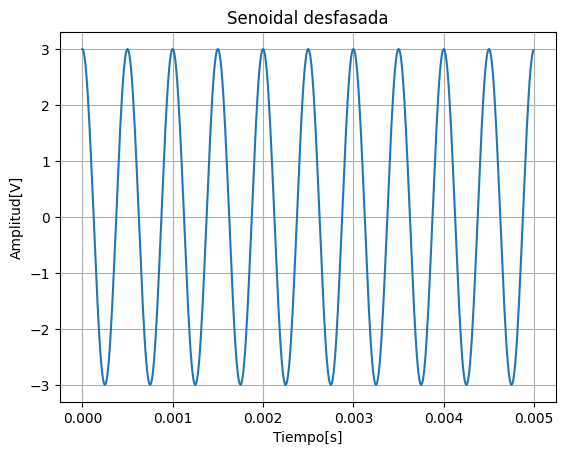

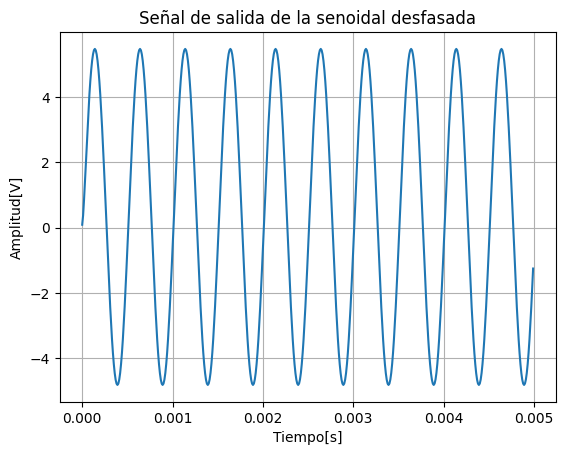

La energía de la senoidal desfasada es: 0.0225
La frecuencia de muestreo es: 100000Hz
El tiempo de simulación es: 0.005s

La energía de la salida de la senoidal desfasada es: 0.0669


In [55]:
#--------------------------------------------------
#desfasada
tt1, yy1 = funcion_seno(vc=3, dc=0, fs=fs, ph=np.pi/2, nn=N, fm=fm)
funcion_grafico(tt1, yy1, 'Senoidal desfasada', 'Tiempo[s]', 'Amplitud[V]')

desfasadaLti=funcion_LTI(yy1)
funcion_grafico(tt, desfasadaLti, 'Señal de salida de la senoidal desfasada', 'Tiempo[s]', 'Amplitud[V]')

energia2 = np.sum(yy1**2)*dt
muestras2=len(yy1)
tiempoMuestras2= dt
print(f'La energía de la senoidal desfasada es: {energia2:.4f}')
print(f'La frecuencia de muestreo es: {fm}Hz')
print(f'El tiempo de simulación es: {N*dt}s\n')

energia3 = np.sum(desfasadaLti**2)*dt
muestras3=len(desfasadaLti)
tiempoMuestras3= dt
print(f'La energía de la salida de la senoidal desfasada es: {energia3:.4f}')


En el caso de la senoidal desfasada, la misma se mantuvo centrada en el eje x=0, y al igual que la anterior, su amplitud aumentó. Esto indica que el filtro no trata de igual manera a todas las fases de la señal senoidal ya que al desfasarla, no se observa un offset en la salida, lo que sí ocurre en la señal senoidal sin desfasar.

Otro fenómeno visible es el desfasaje con respecto a la señal la cual dejó de tener su máximo en x=0.

Al igual que la anterior, su frecuencia se mantuvo.

Esto indica que el sistema LTI tiene una salida amplificadora, ya que en ambos casos, las señales senoidales aumentaron en su amplitud. Como resultado de esto, su energía también aumentó.

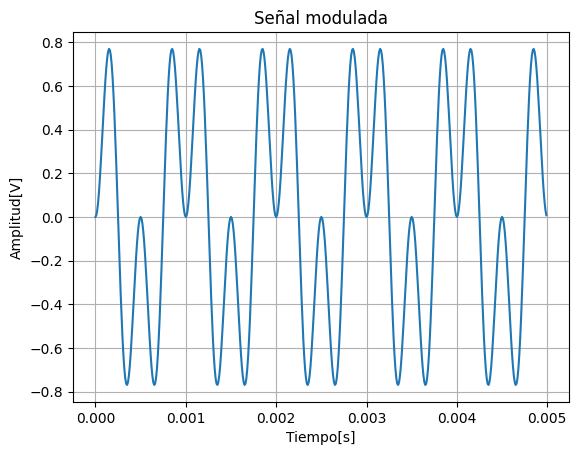

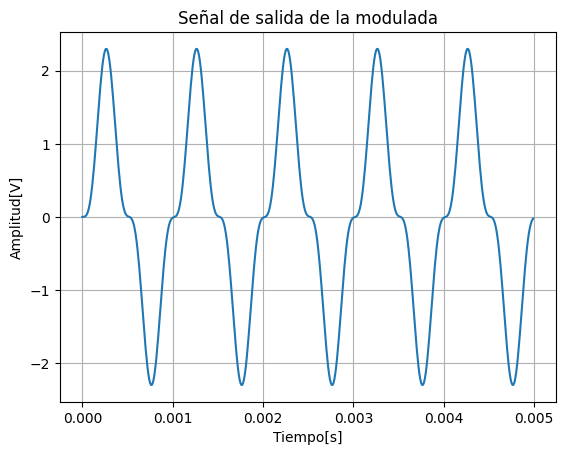

La energía de la señal modulada es: 0.0013
La frecuencia de muestreo es: 100000Hz
El tiempo de simulación es: 0.005s

La energía de la salida de la señal modulada es: 0.0084


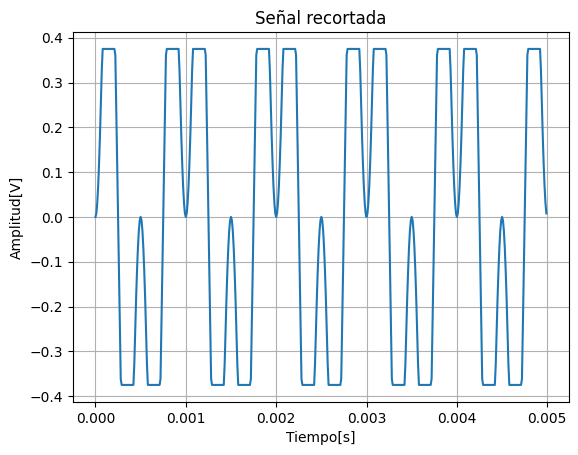

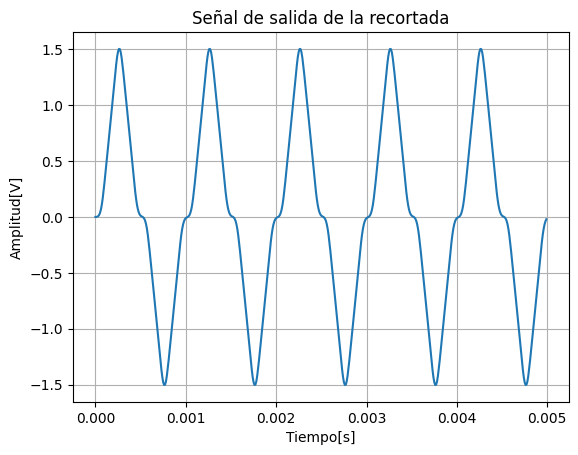

La energía de la señal modulada recortada es: 0.0005
La frecuencia de muestreo es: 100000Hz
El tiempo de simulación es: 0.005s

La energía de la salida de la señal modulada recortada es: 0.0036


In [65]:
#Modulada
def funcion_seno_moduladora(vc=1, dc=0, fs2=None, ph=0, nn=N, fm=fm):
    t = np.linspace(0, N/fm, N, endpoint=False)
    sen=(vc*np.sin(2*np.pi*fs2*t+ph)+dc)
    return t,sen

fs2=1000
tt2, yy2 = funcion_seno_moduladora(vc=1, dc=0, fs2=1000, ph=0, nn=N, fm=fm)
mody=yy2*yy
funcion_grafico(tt2, mody, 'Señal modulada', 'Tiempo[s]', 'Amplitud[V]')

moduladaLti=funcion_LTI(mody)
funcion_grafico(tt, moduladaLti, 'Señal de salida de la modulada', 'Tiempo[s]', 'Amplitud[V]')

energia10 = np.sum(mody**2)*dt
print(f'La energía de la señal modulada es: {energia10:.4f}')
print(f'La frecuencia de muestreo es: {fm}Hz')
print(f'El tiempo de simulación es: {N*dt}s\n')

energia5 = np.sum(moduladaLti**2)*dt
print(f'La energía de la salida de la señal modulada es: {energia5:.4f}')

#--------------------------------------------------
#recortada
vc=1
potencia=(vc**2)/2

#Calulo el 75% de la potencia
threshold=potencia*0.75

yyRecortada=np.clip(mody,-threshold,threshold)
funcion_grafico(tt, yyRecortada, 'Señal recortada', 'Tiempo[s]', 'Amplitud[V]')


recortadaLti=funcion_LTI(yyRecortada)
funcion_grafico(tt, recortadaLti, 'Señal de salida de la recortada', 'Tiempo[s]', 'Amplitud[V]')

energia4 = np.sum(yyRecortada**2)*dt
muestras4=len(yyRecortada)
tiempoMuestras4= dt
print(f'La energía de la señal modulada recortada es: {energia4:.4f}')
print(f'La frecuencia de muestreo es: {fm}Hz')
print(f'El tiempo de simulación es: {N*dt}s\n')

energia5 = np.sum(recortadaLti**2)*dt
print(f'La energía de la salida de la señal modulada recortada es: {energia5:.4f}')



Para la señal modulada y la recortada, vuelve a ocurrir una ampliación de la señal a la vez que se mantiene la frecuencia. Es decir, ocurre lo mismo que en los casos anteriores. También aumenta la energía.

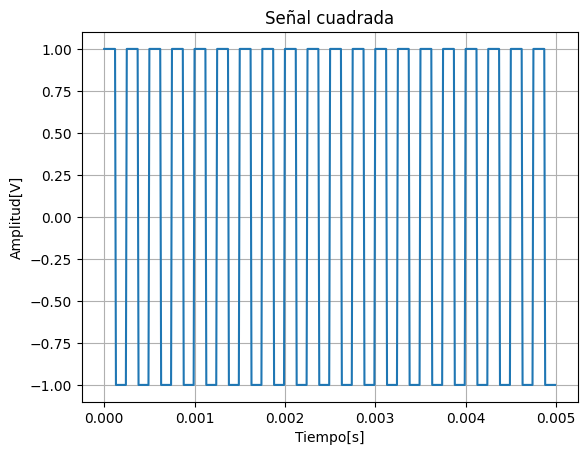

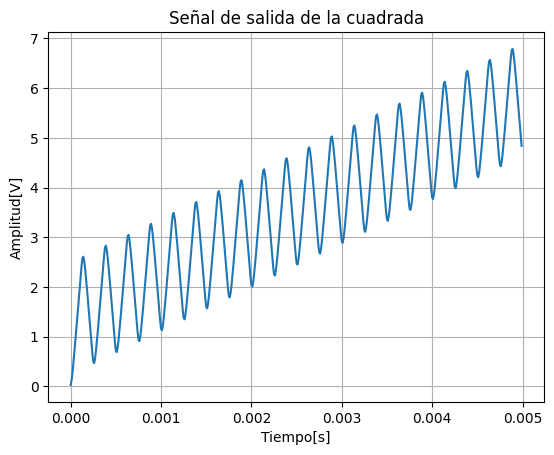

La energía de la cuadrada es: 0.0050
La frecuencia de muestreo es: 100000Hz
El tiempo de simulación es: 0.005s

La energía de la salida de la cuadrada es: 0.0743


In [66]:
#Cuadrada
t = np.linspace(0, N/fm, N, endpoint=False)
frec=4000

# Señal cuadrada
sq_wave = signal.square(2 * np.pi * frec * t)
funcion_grafico(tt, sq_wave, 'Señal cuadrada', 'Tiempo[s]', 'Amplitud[V]')

cuadradaLti=funcion_LTI(sq_wave)
funcion_grafico(tt, cuadradaLti, 'Señal de salida de la cuadrada', 'Tiempo[s]', 'Amplitud[V]')

energia6 = np.sum(sq_wave**2)*dt
print(f'La energía de la cuadrada es: {energia6:.4f}')
print(f'La frecuencia de muestreo es: {fm}Hz')
print(f'El tiempo de simulación es: {N*dt}s\n')

energia7 = np.sum(cuadradaLti**2)*dt
print(f'La energía de la salida de la cuadrada es: {energia7:.4f}')


 La salida de la señal cuadrada deja en evidencia el impacto que tienen los diferentes valores que multiplican a los términos de retroalimentación. Si se toman los parámetros que multiplican a los diferentes térmios de retroalimentación de x, se ven que son valores pequeños, generando una cierta suavidad en la señal resultante. 
 
Para los términos de retroalimentación de y, los factores multiplicantes son 1,5 y 0,5. El primero es el factor acumulativo, al ser tan grande genera que se vaya acumulando, efecto que se observa en el crecimiento progresivo. Por otro lado, el factor 0,5 provoca una especie de disminución, lo que se observa en las pequeñas ondulaciones que acompañan al crecimiento.

 Esto no se ve representado en las señales anteriores porque las mismas no tienen saltos bruscos entre muestras, como sí lo tiene la señal cuadrada.
 
Con respecto a la energía, también aumentó debido a que los nuevos valores de la función son mayores que los de la cuadrada. 

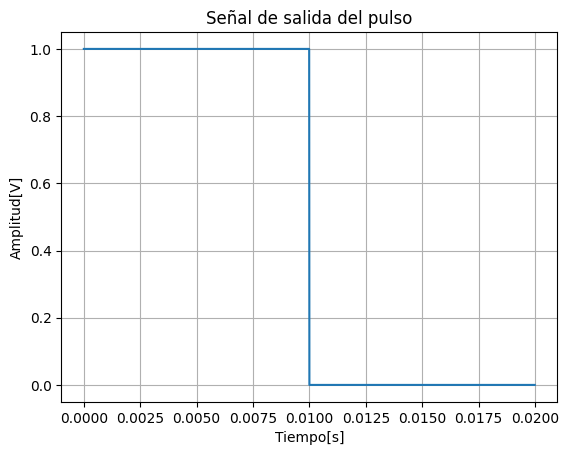

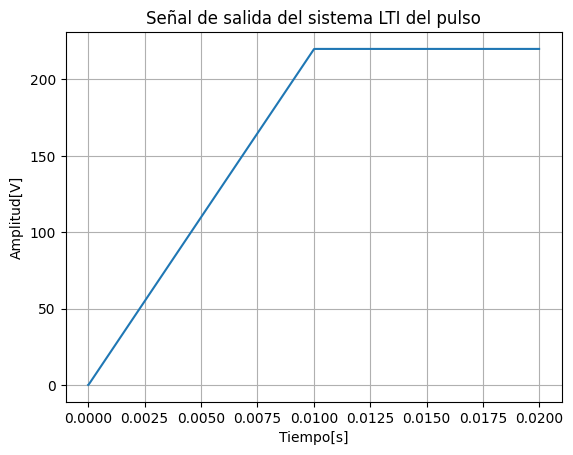

La energía del pulso rectangular es: 0.0100
La frecuencia de muestreo es: 100000 Hz
El tiempo de simulación es: 0.0200 s
La energía de la salida del pulso rectangular es: 644.6062


In [9]:
#--------------------------------------------------
#pulso rectangular

# Parámetros
fm = 100000        # frecuencia de muestreo [Hz]
T = 0.02           # tiempo total de simulación [s]
A = 1.0           # amplitud del pulso
t0 = 0       # inicio del pulso [s]
Tp = 10e-3        # duración del pulso [s]

# Vector de tiempo
t = np.arange(0, T, 1/fm)
T_sim = t[-1] - t[0] + dt 


# Defino el pulso
pulso = np.zeros_like(t)                   # todo en cero
pulso[(t >= t0) & (t < t0 + Tp)] = A       # intervalo activo


funcion_grafico(t, pulso, 'Señal de salida del pulso', 'Tiempo[s]', 'Amplitud[V]')


pulsoLti=funcion_LTI(pulso)
funcion_grafico(t, pulsoLti, 'Señal de salida del sistema LTI del pulso', 'Tiempo[s]', 'Amplitud[V]')

dt = 1/fm
energia8 = np.sum(pulso**2)*dt
print(f'La energía del pulso rectangular es: {energia8:.4f}')
print(f'La frecuencia de muestreo es: {fm} Hz')
print(f"El tiempo de simulación es: {T_sim:.4f} s")

energia9 = np.sum(pulsoLti**2)*dt
print(f'La energía de la salida del pulso rectangular es: {energia9:.4f}')

Para el pulso lo que se puede observar nuevamente es el acumulamiento de la función que aquí toma gran importancia ya que el acumulamiento es significativo. Esto se ve representado en el rango de amplitudes de los gráficos que previamente era de [0, 1] , luego de aplicarle el sistema LTI se encuentra de [0 , 210]. Esto también se ve ilustrado en el valor de la energía.

 Luego se pidió hacer lo mismo, pero esta vez que la función de entrada sea un pulso. Lo que se busca comprobar es la consistencia de la propiedad de convolución en sistemas LTI. Cuando se utiliza un pulso como entrada, la salida obtenida representa la respuesta al impulso del sistema. Luego, al convolucionar esta salida con otra señal, el resultado debe coincidir con el obtenido si esa señal se aplicara directamente al sistema. Esto se justifica en que la convolución es una operación conmutativa y asociativa, por lo cual el orden en el que se realice (primero sobre el pulso y luego sobre la señal, o directamente sobre la señal con la respuesta al impulso) no modifica los muestreos finales de la salida.
 

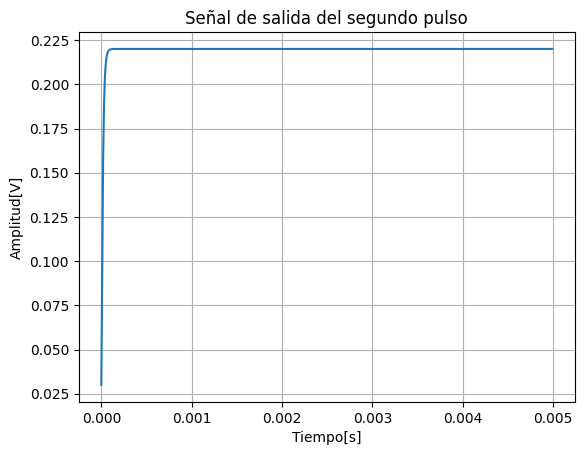

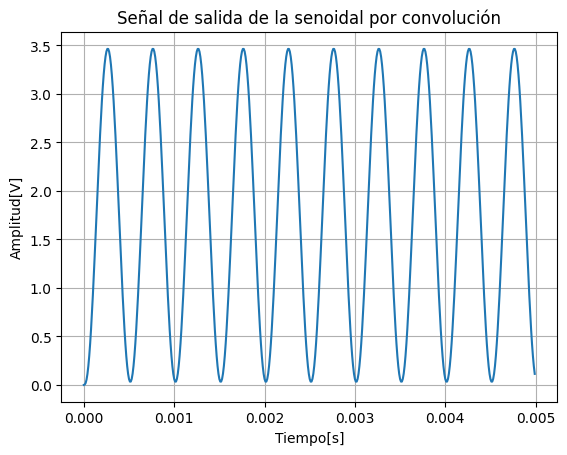

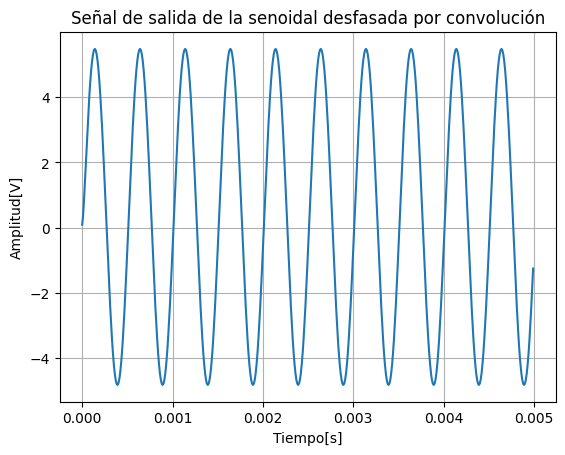

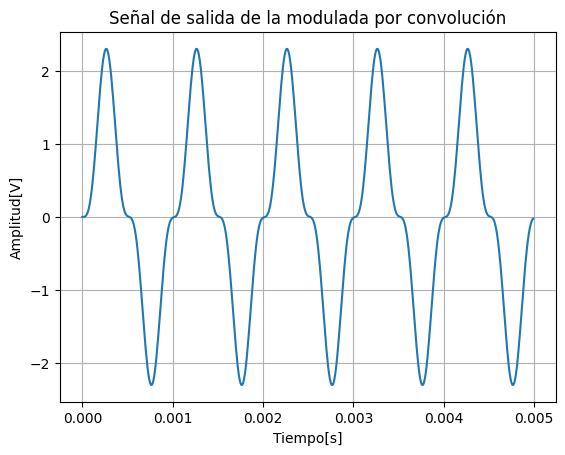

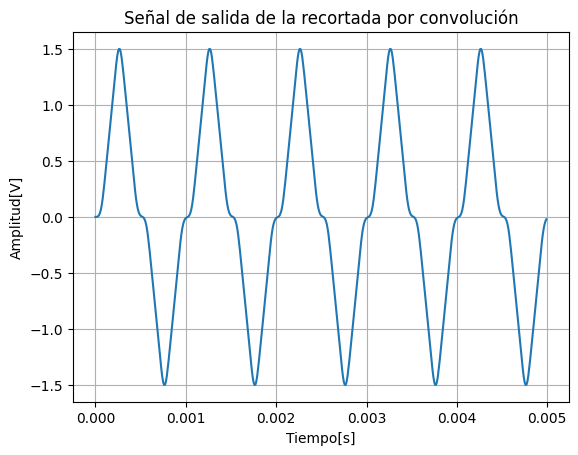

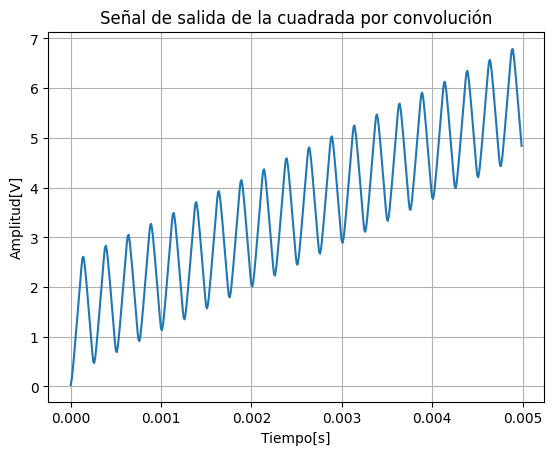

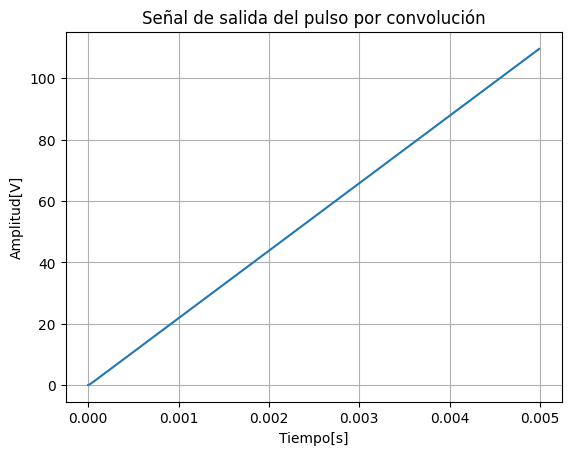

In [12]:
#pulso

pulso2= np.zeros(N)
pulso2[0]=1.0

pulso2Lti=funcion_LTI(pulso2)
funcion_grafico(tt, pulso2Lti, 'Señal de salida del segundo pulso', 'Tiempo[s]', 'Amplitud[V]')

#-----------------------------------
#Convolución con cada señal para obtener la misma salida

senConv=np.convolve(yy,pulso2Lti)[:N]
desConv=np.convolve(yy1,pulso2Lti)[:N]
modConv=np.convolve(mody,pulso2Lti)[:N]
recConv=np.convolve(yyRecortada,pulso2Lti)[:N]
sqrConv=np.convolve(sq_wave,pulso2Lti)[:N]
pulsConv=np.convolve(pulso,pulso2Lti)[:N]

funcion_grafico(tt, senConv, 'Señal de salida de la senoidal por convolución', 'Tiempo[s]', 'Amplitud[V]')
funcion_grafico(tt, desConv, 'Señal de salida de la senoidal desfasada por convolución', 'Tiempo[s]', 'Amplitud[V]')
funcion_grafico(tt, modConv, 'Señal de salida de la modulada por convolución', 'Tiempo[s]', 'Amplitud[V]')
funcion_grafico(tt, recConv, 'Señal de salida de la recortada por convolución', 'Tiempo[s]', 'Amplitud[V]')
funcion_grafico(tt, sqrConv, 'Señal de salida de la cuadrada por convolución', 'Tiempo[s]', 'Amplitud[V]')
funcion_grafico(tt, pulsConv, 'Señal de salida del pulso por convolución', 'Tiempo[s]', 'Amplitud[V]')


    Los gráficos comprueban que el resultado es el mismo.
    

Siguiendo con el desarrollo del trabajo, se definieron dos nuevos sistemas LTI

    y[n]=x[n]+3⋅x[n−10]
    y[n]=x[n]+3⋅y[n−10]
    
 Por estos sistemas se pasó como entrada una señal senoidal, obteniendo el siguiente resultado:

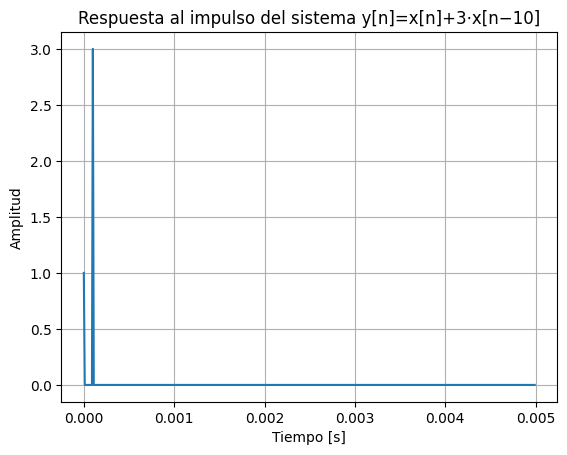

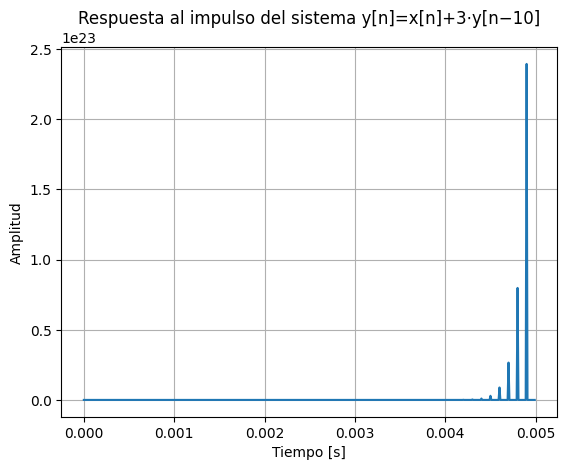

Energía de la respuesta al impulso para el primer sisema es: 0.0002
Energía de la respuesta al impulso para el segundo sisema es: 0.0002


In [4]:
def funcion_LTI1(x):
    N = len(x)          # longitud de la señal de entrada
    y1 = np.zeros(N)     # inicializo la salida en ceros

    for n in range(N):
        if n >= 10:
            y1[n] = x[n] +3*x[n-10] 
        else:  # n == 0
            y1[n] = x[n]
    
    return y1

def funcion_LTI2(x):
    N = len(x)          # longitud de la señal de entrada
    y2 = np.zeros(N)     # inicializo la salida en ceros

    for n in range(N):
        y2[n] = x[n] +3*y2[n-10] 

    return y2

respuesta_impulso1 = funcion_LTI1(impulso)
respuesta_impulso2 = funcion_LTI2(impulso)
funcion_grafico(np.arange(N)*dt, respuesta_impulso1, 'Respuesta al impulso del sistema y[n]=x[n]+3⋅x[n−10]', 'Tiempo [s]', 'Amplitud')
funcion_grafico(np.arange(N)*dt, respuesta_impulso2, 'Respuesta al impulso del sistema y[n]=x[n]+3⋅y[n−10]', 'Tiempo [s]', 'Amplitud')

energia_impulso1 = np.sum(respuesta_impulso1**2)*dt
print(f'Energía de la respuesta al impulso para el primer sisema es: {energia_impulso:.4f}')
energia_impulso2 = np.sum(respuesta_impulso2**2)*dt
print(f'Energía de la respuesta al impulso para el segundo sisema es: {energia_impulso:.4f}')

En el primer caso y[n]=x[n]+3x[n−10]) la respuesta al impulso muestra dos muestras no nulas (en n=0 y n=10), por lo que la respuesta al impulso es finita y su longitud exacta es 11 muestras. El sistema es FIR y BIBO estable porque la salida ante entradas acotadas permanece acotada.

En el segundo caso y[n]=x[n]+3y[n−10]) la respuesta al impulso contiene pulsos en n=0,10,20,… con amplitud que incremeta a medida que n aumenta. La respuesta no decae sino que crece exponencialmente, por lo que la longitud es, en teoría, infinita y la respuesta no es absolutamente sumable. 
Cualquier N finito sólo muestra una porción truncada y puede no ser representativo, ya que la salida sigue creciendo indefinidamente.

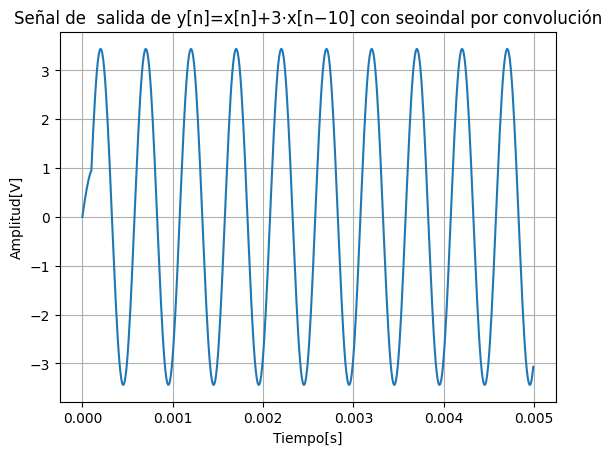

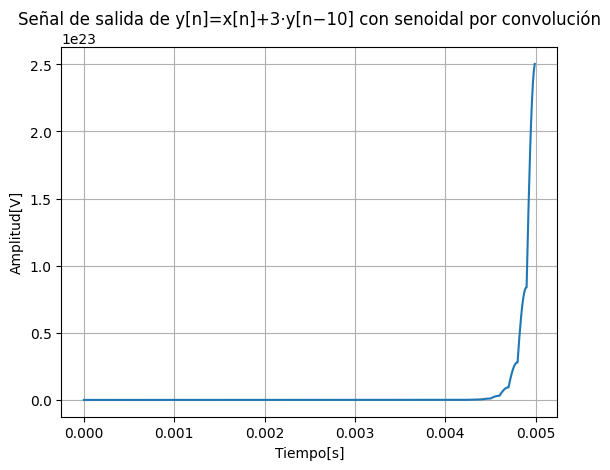

In [6]:
#----------------------
#convoluciono por senoidal
senConv=np.convolve(yy,respuesta_impulso1)[:N]
desConv=np.convolve(yy,respuesta_impulso2)[:N]

funcion_grafico(tt, senConv, 'Señal de  salida de y[n]=x[n]+3⋅x[n−10] con seoindal por convolución', 'Tiempo[s]', 'Amplitud[V]')
funcion_grafico(tt, desConv, 'Señal de salida de y[n]=x[n]+3⋅y[n−10] con senoidal por convolución', 'Tiempo[s]', 'Amplitud[V]')

Lo que se observa en los gráficos es por un lado, la primera salida de la senoidal es equivalente a superponer una senoidal con otra desfasada y amplificada. Esto nos da una senoidal, la cual en los primeros instantes tiene una especie de período transitorio que es el equivalente a las primeras 10 muestras que son únicamente de la senoidal original, luego comienza la superposición de senoidales que resulta en una senoidal con una amplitud ligeramente mayor pero con igual frecuencia (como sucede en los casos anteriores).

Para el segundo gráfico, ya no se observa una señal con forma senoidal, sino que se puede ver algo que se asemeja a una exponencial. Esto es debido a que en el segundo sistema LTI, hay una realimentación de la señal en y[u] muy grande. Como se puede analizar en el gráfico, la señal no tiene un crecimiento repentino al principio, ya que el acumulamiento arranca a partir de la décima muestra y luego va aumentando paulatinamente al principio y luego se da el crecimiento exponencial que se ve al final. Otro dato a tener en cuenta es la escala del eje y, la cual no nos permite ver bien el gráfico en los primeros instantes. Es por eso que en el siguiente código se ajustó el gráfico a ciertos parámetros para poder observar los primeros comportamientos de la función.

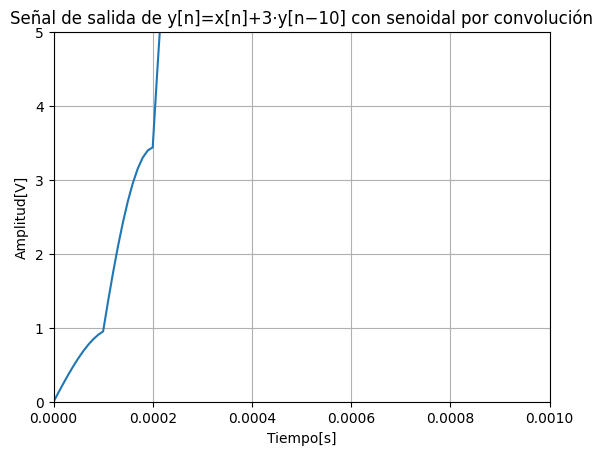

In [7]:

#grafico
plt.plot(tt, desConv)
plt.xlim(0, 0.001)
plt.ylim(0, 5)
plt.title('Señal de salida de y[n]=x[n]+3⋅y[n−10] con senoidal por convolución')
plt.xlabel('Tiempo[s]')
plt.ylabel('Amplitud[V]')
plt.grid(True)
plt.show()


Si se observan los gráficos de los impulsos, los mismos ilustran el funcionamiento del sistema LTI, para el primer impulso se ve una primera recta que representa el delta y luego, unos segundos más tarde, se ve el equivalente al impulso amplificado que está dado en el valor de muestreo 10.

Para el segundo impulso en cambio, representa al segundo sistema LTI el cual tiene retroalimentación de Y. Esto se observa en los pilares que aumentan gradualmente a medida que se avanza en las muestras. 

Nuevamente, al principio se observan las primeras diez muestras de la función senoidal original, luego comienza a haber una acumulación y arranca el incremento en la señal que antes, por la escala, no se podía ver.

Por último se buscó discretizar una ecuación diferencial utilizando el método de diferencias finitas.

Para comenzar se utiliza la siguiente aproximación:

$$
\frac{dP}{dt}\Big|_{t=nT_s} \approx \frac{P[n+1]-P[n]}{T_s}.
$$

Si reemplazamos en la ecuación diferencial, se obtiene:

$$
\frac{P[n+1]-P[n]}{T_s} = \frac{1}{C}Q[n] - \frac{1}{RC}P[n].
$$

Luego, reorganizando la ecuación se obtiene:

$$
P[n+1] = \left(1 - \frac{T_s}{RC}\right) P[n] + \frac{T_s}{C}Q[n].
$$


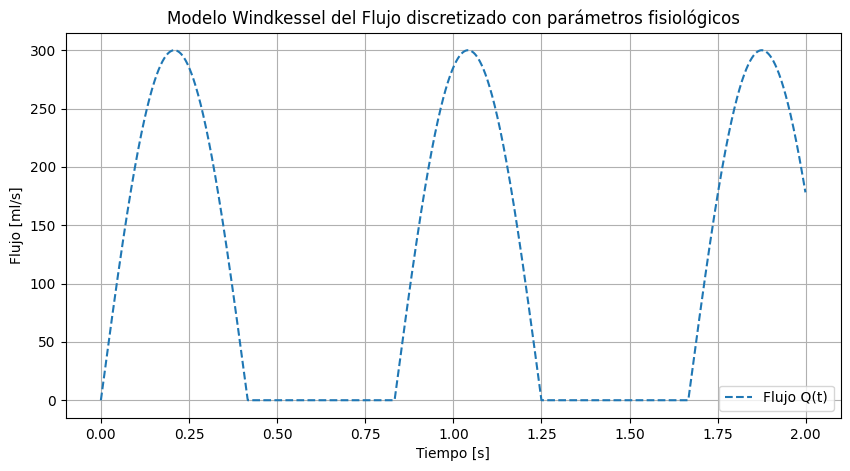

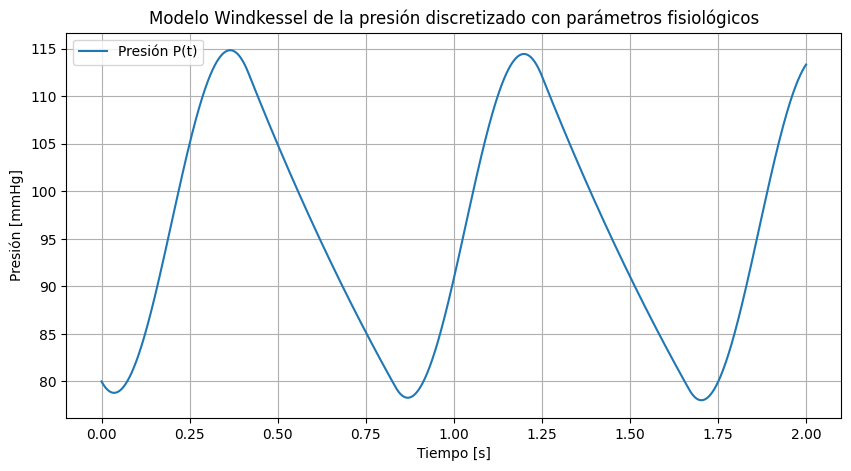

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros (unidades: ml, mmHg, s) ---
fs = 1000.0            # Hz (muestreo)
Ts = 1.0 / fs
N = 2000               # muestras -> 2 s
t = np.arange(N) * dt

# Valor fisiológico coherentes
f = 1.2                # Hz (60 lat/min)

# Flujo de entrada: semisinusoidal positiva (half-sine)
Q = 300 * np.maximum(0.0, np.sin(2.0 * np.pi * f * t))  # ml/s

# Resistencias / compliance (unidades coherentes)
R = 1    # mmHg·s/ml 
C = 1.2                # mL/mmHg 

# Inicialización de la presión
P = np.zeros(N)
P[0] = 80      # inicio cerca del equilibrio

# Ecuación en diferencias (Euler hacia adelante)
for n in range(N-1):
    P[n+1] = (1 - Ts/(R*C)) * P[n] + (Ts/C) * Q[n]

# Gráfica
plt.figure(figsize=(10,5))
plt.plot(t, Q, label="Flujo Q(t)", linestyle="--")
plt.xlabel("Tiempo [s]")
plt.ylabel("Flujo [ml/s]")
plt.title("Modelo Windkessel del Flujo discretizado con parámetros fisiológicos")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(t, P, label="Presión P(t)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Presión [mmHg]")
plt.title("Modelo Windkessel de la presión discretizado con parámetros fisiológicos")
plt.legend()
plt.grid(True)
plt.show()



En el gráfico la señal Q(t) se elige para simular el flujo sanguíneo pulsátil que el corazón bombea hacia el sistema arterial. El ventrículo izquierdo del corazón eyecta sangre en pulsos durante la fase de sístole (contracción y eyección), lo que resulta en un flujo positivo hacia las arterias reepresentado por la senoidal. Durante la fase de diástole (relajación y llenado del corazón), el corazón no está bombeando activamente sangre hacia las arterias, por lo que el flujo de entrada al sistema arterial es esencialmente cero. 

 Como se observa en el gráfico, en la presión no hay un fenómeno de acumulación como sí ocurria en los modelos anteriores. Esto se debe a los factores que multiplican a la retroalimentación del sistema. 

## CONCLUSIONES

En esta tarea semanal se pudo evaluar el comportamiento de tres sistemas linealmente invariantes en el tiempo. Se obseravaron diferentes fenómenos, como el de acumulación y el de atenuación en el Bonus. A su vez se verificaron las propiedades que definen al sistema utilizando un pulso de salida y haciendo la convolución de este con las diferentes señales, comprobando que el resultado era el mismo. 

Con respecto a la salida del impulso, es importante reflexionar sobre la longitud de la respuesta al impulso y su relación con la cantidad de muestras utilizadas en la entrada.Cuando la señal de entrada tiene una longitud de N muestras, la cantidad de muestras necesarias para representar correctamente la respuesta al impulso depende de si el sistema es estable o inestable.

En un sistema LTI estable, la respuesta al impulso es absolutamente sumable, es decir, su amplitud tiende a cero con el tiempo o el número de muestras. Por lo tanto, basta con considerar un número finito de muestras que abarque la parte significativa de la respuesta, ya que las muestras posteriores tienen amplitud muy baja y su aporte a la salida es despreciable. En estos casos, suele ser suficiente una longitud similar o algo mayor que la de la señal de entrada para representar correctamente el comportamiento del sistema.

Por el contrario, en un sistema LTI inestable, la respuesta al impulso no decae sino que crece o se mantiene constante a lo largo del tiempo. En estas condiciones, la respuesta no puede representarse con una cantidad finita de muestras, ya que su energía o amplitud no se atenúan. Esto implica que, aunque la señal de entrada tenga longitud N, la respuesta al impulso requeriría una cantidad de muestras mucho mayor, o incluso infinita, para describir completamente el sistema.

## AUTOEVALUACIÓN DEL APRENDIZAJE

    Resolví la tarea pero tengo dudas. No se si es más conveniente graficar la salida del sistema en función al numero de muestra. 
    Utilicé chat gpt para que me ayude a interpretar los gráficos y para que me de los valores de frecuencia cardíaca necesarios para completar el bonus. También las unidades utlizadas en el mismo. 